In [3]:
import sys
sys.path.append("..")
import engine
from engine import racecar
import engine.magic_moment_method.vehicle_params as vehicles
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

easy_driver = engine.Racecar(vehicles.Concept2023(motor_directory="../engine/magic_moment_method/vehicle_params/Eff228.csv"))
easy_driver.ggv = pd.read_csv("GGV.csv")
# easy_driver.regenerate_GGV(sweep_range, mesh_size)
# easy_driver.save_ggv("engine/magic_moment_method/analysis/GGV.csv")

In [4]:
data = []
velocity_sweep = np.linspace(0, easy_driver.params.max_vel, 50)
for velocity in velocity_sweep:
    max_lateral = easy_driver.lateral(velocity)
    for lateral in np.linspace(-max_lateral, max_lateral, 100):
        long_forward, _, _, _ = easy_driver.accel(velocity,lateral)
        long_reverse, _, _, _= easy_driver.deccel(velocity,lateral)
        data.append([velocity, long_forward, lateral])
        data.append([velocity, long_reverse * -1, lateral])
df = pd.DataFrame(data, columns=["vel", "long", "lat"])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0.5, 0.92, 'G-G-V Diagram')

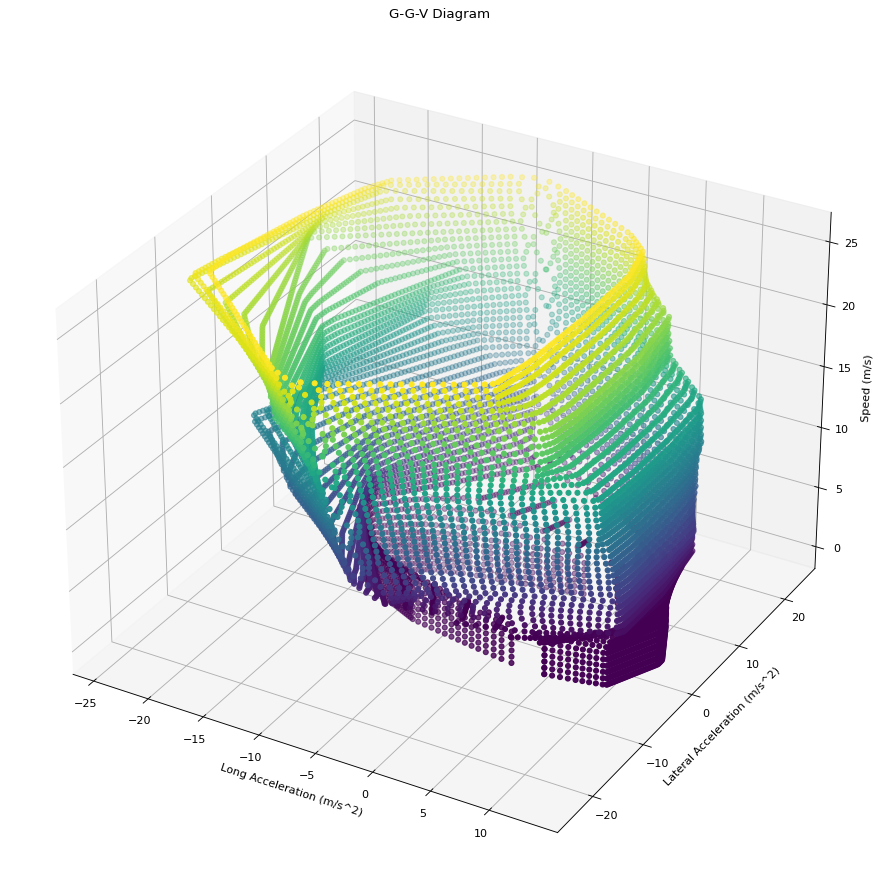

In [5]:
fig = plt.figure(figsize=(14, 14), dpi=80)
ax = fig.add_subplot(111, projection='3d')
col = plt.get_cmap('viridis')
for vel in df["vel"].unique():
    temp_df = df[df["vel"] == vel]
    color = col((vel-5)/(easy_driver.params.max_vel-5))
    ax.scatter(temp_df["long"], temp_df["lat"], temp_df["vel"], c=color)  
ax.set_ylabel("Lateral Acceleration (m/s^2)")
ax.set_xlabel("Long Acceleration (m/s^2)")
ax.set_zlabel("Speed (m/s)")
ax.set_title("G-G-V Diagram")

Text(0.5, 0.92, 'G-G-V Diagram')

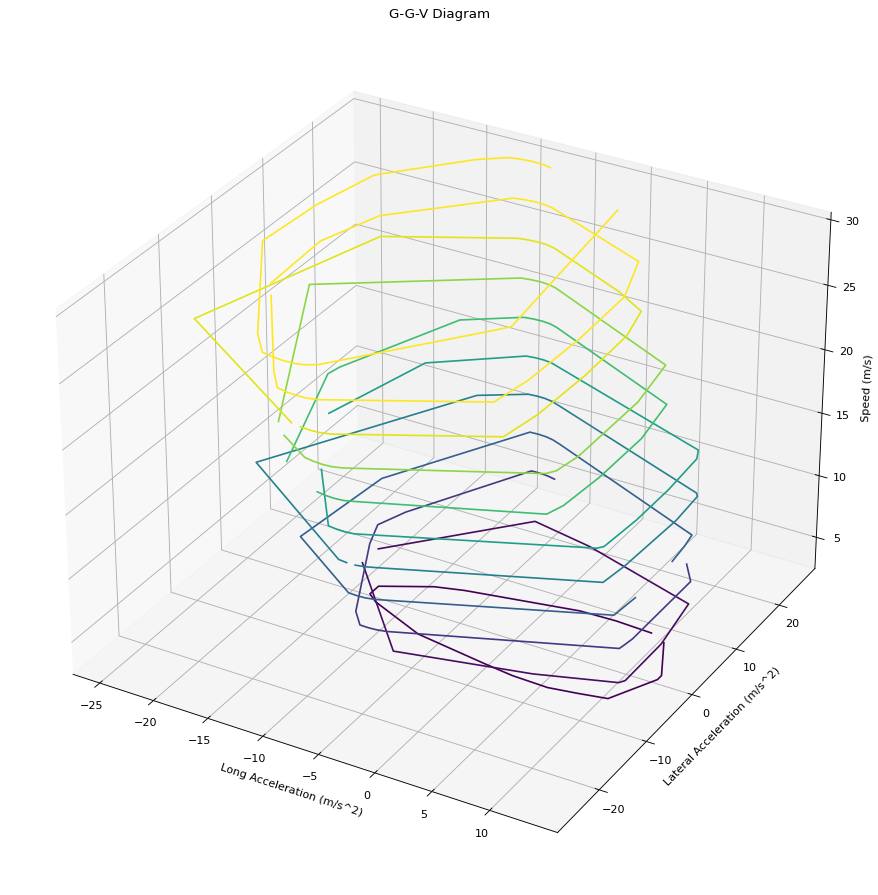

In [10]:
fig = plt.figure(figsize=(14, 14), dpi=80)
ax = fig.add_subplot(111, projection='3d')
col = plt.get_cmap('viridis')
data_df = pd.read_csv("GGV.csv")
for vel in data_df["s_dot"].unique():
    temp_df = data_df[data_df["s_dot"] == vel]
    color = col((vel-5)/(easy_driver.params.max_vel-5))
    ax.plot(temp_df["vehicle_accelerations_NTB_0"], temp_df["vehicle_accelerations_NTB_1"], temp_df["s_dot"], c=color) 
    ax.scatter(temp_df["vehicle_accelerations_NTB_0"], temp_df["vehicle_accelerations_NTB_1"], temp_df["s_dot"], c=color)  
ax.set_ylabel("Lateral Acceleration (m/s^2)")
ax.set_xlabel("Long Acceleration (m/s^2)")
ax.set_zlabel("Speed (m/s)")
ax.set_title("G-G-V Diagram")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0.5, 1.0, 'G-G-V: Long vs Lateral Acceleration at Varying Speeds')

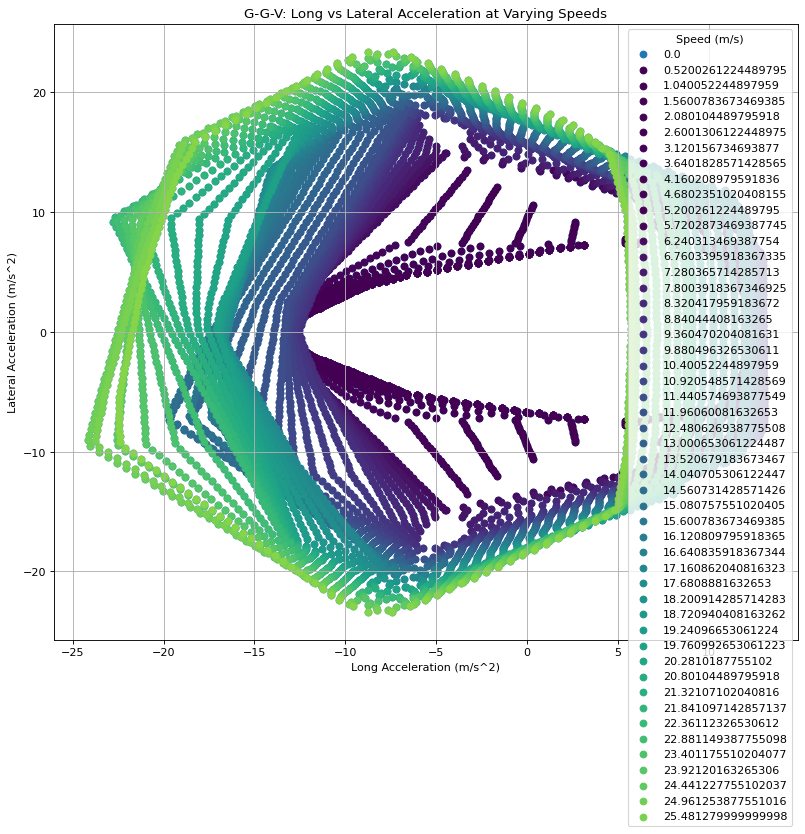

In [ ]:
fig = plt.figure(figsize=(12, 10), dpi=80)
col = plt.get_cmap('viridis')

plt.scatter(df["long"], df["lat"])
for vel in df["vel"].unique():
    temp_df = df[df["vel"] == vel]
    color = col((vel-5)/(30-5))
    plt.scatter(temp_df["long"], temp_df["lat"], c=color)  
plt.grid()
plt.ylabel("Lateral Acceleration (m/s^2)")
plt.xlabel("Long Acceleration (m/s^2)")
plt.legend(list(df["vel"].unique()), title = "Speed (m/s)", loc = "upper right")
plt.title("G-G-V: Long vs Lateral Acceleration at Varying Speeds")